In [1]:
import trompy as tp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
%run ..//source//FED_functions.py

File is excel file. Making csv metafile first
File is excel file. Making csv metafile first
File is excel file. Making csv metafile first


In [3]:
mice.keys()

dict_keys(['FEDXA01', 'FEDXA02', 'FEDXA03', 'FEDXA04', 'FEDXA05', 'FEDXA06', 'FEDXA07', 'FEDXA08', 'FEDXA09', 'FEDXA10', 'FEDXA11', 'FEDXA12', 'FEDXB01', 'FEDXB02', 'FEDXB03', 'FEDXB04', 'FEDXB05', 'FEDXB06', 'FEDXB07', 'FEDXB08', 'FEDXB10', 'FEDXB11', 'FEDXB12'])

In [5]:
mice["FEDXA01"].keys()

dict_keys(['sex', 'order', 'grain_timestamps', 'pr_timestamps', 'nr_timestamps', 'bodyweight', 'hoarding', 'grain_avg_pellets', 'pr_avg_pellets', 'nr_avg_pellets', 'grain_pellets_per_day', 'pr_pellets_per_day', 'nr_pellets_per_day', 'all_pellets_per_day', 'interpellet_intervals_pr', 'intermeal_interval_pr', 'mealsize_pr', 'interpellet_intervals_nr', 'intermeal_interval_nr', 'mealsize_nr'])

In [6]:
nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}
nrpr_female_selector = {"order": 1, "sex": "F"}
prnr_female_selector = {"order": 2, "sex": "F"} 

6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


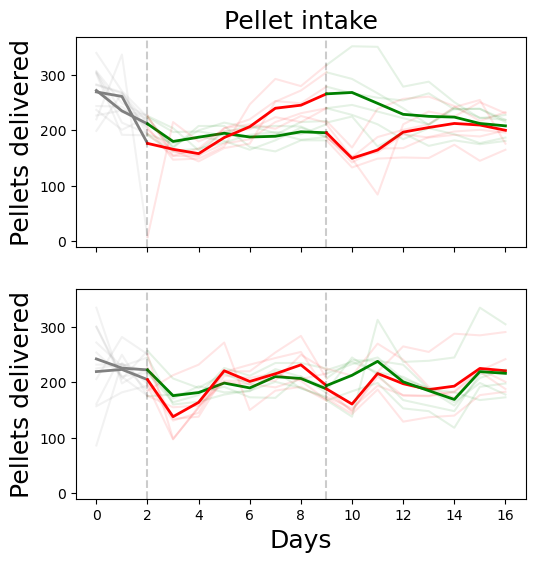

In [7]:
#plot shows timeline of total number of pellets delievered per day in NRPR and PRNR male and Females
def timeline_fig(data, ax=[], ylabel="", **kwargs):
    if ax == []:
        f, ax = plt.subplots() #could check if ax is axis object
    
    for trace in data:
        ax.plot(trace, color="grey", alpha=0.3)
    ax.plot(np.mean(data, axis=0), linewidth=2)

    ax.set_ylabel(ylabel)
    ax.axvline(2, linestyle="--", color="k")
    ax.axvline(9, linestyle="--", color="k")

    return ax

def timeline_multicolor_fig(data, ax=[], ylabel="", colors=[], day_split=[2, 9], max_days=17, **kwargs):
    if ax == []:
        f, ax = plt.subplots() #could check if ax is axis object

    colors_reversed = colors[-1:]
    #plt.rcParams["font.size"] = 18

    for group in data:
        for trace in group:
            trace = trace[:max_days]
            ax.plot(range(0,3), trace[:3], color="grey", alpha=0.1)
            ax.plot(range(2,10), trace[2:10], color=colors[0], alpha=0.1)
            ax.plot(range(9,len(trace)), trace[9:], color=colors[1], alpha=0.1)

        mean = np.mean(group, axis=0)[:max_days]
        ax.plot(range(0,3), mean[:3], color="grey", linewidth=2)
        ax.plot(range(2,10), mean[2:10], color=colors[0], linewidth=2)
        ax.plot(range(9,len(mean)), mean[9:], color=colors[1], linewidth=2)

        colors.reverse()

    ax.set_ylabel(ylabel, fontsize= 18)
    ax.axvline(2, linestyle="--", color="k", alpha=0.2)
    ax.axvline(9, linestyle="--", color="k", alpha=0.2)

    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
   

    return ax

nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}
nrpr_female_selector = {"order": 1, "sex": "F"}
prnr_female_selector = {"order": 2, "sex": "F"}

nrpr_m = get_data_fields(mice, ["all_pellets_per_day"], nrpr_male_selector)
prnr_m = get_data_fields(mice, ["all_pellets_per_day"], prnr_male_selector)
nrpr_f = get_data_fields(mice, ["all_pellets_per_day"], nrpr_female_selector)
prnr_f = get_data_fields(mice, ["all_pellets_per_day"], prnr_female_selector)

f, ax = plt.subplots(nrows=2, sharex=True, figsize=(6,6), gridspec_kw= {"left": 0.15})

timeline_multicolor_fig([nrpr_m, prnr_m], colors=["green", "red"], ylabel="Pellets delivered", ax=ax[0])
timeline_multicolor_fig([nrpr_f, prnr_f], colors=["green", "red"], ylabel="Pellets delivered", ax=ax[1])

ax[1].set_xlabel("Days", fontsize = 18)
ax[0].set_title("Pellet intake", fontsize = 18)
ax[1].set_ylim(ax[0].get_ylim())

figfolder = "C://Users//hta031//OneDrive - UiT Office 365//Documents//People//Hamid//Presentations//"
#f.savefig(figfolder + "timeline pellets delievered+.pdf")

In [9]:
ax[0].plot(prnr_m[0],c="r", label="NR")
ax[0].legend(loc ="upper left")

6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


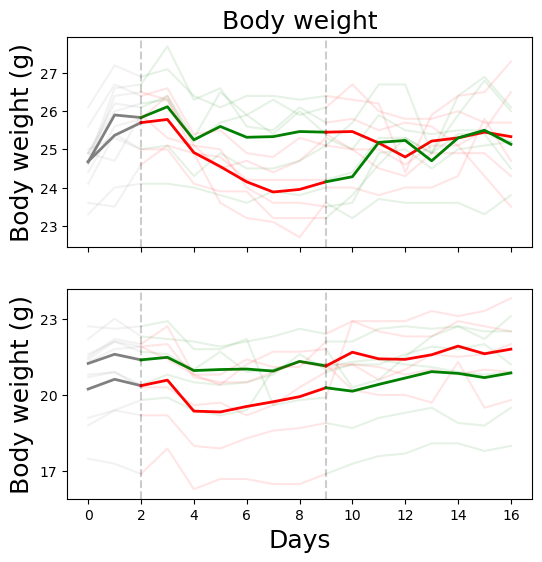

In [10]:
#plot shows timeline of body weights per day in NRPR and PRNR male and Females

def timeline_fig(data, ax=[], ylabel="", **kwargs):
    if ax == []:
        f, ax = plt.subplots() #could check if ax is axis object
    
    for trace in data:
        ax.plot(trace, color="grey", alpha=0.3)
    ax.plot(np.mean(data, axis=0), linewidth=2)

    ax.set_ylabel(ylabel)
    ax.axvline(2, linestyle="--", color="k")
    ax.axvline(9, linestyle="--", color="k")

    return ax

def timeline_multicolor_fig(data, ax=[], ylabel="", colors=[], day_split=[2, 9], max_days=17, **kwargs):
    if ax == []:
        f, ax = plt.subplots() #could check if ax is axis object

    colors_reversed = colors[-1:]

    for group in data:
        for trace in group:
            trace = trace[:max_days]
            ax.plot(range(0,3), trace[:3], color="grey", alpha=0.1)
            ax.plot(range(2,10), trace[2:10], color=colors[0], alpha=0.1)
            ax.plot(range(9,len(trace)), trace[9:], color=colors[1], alpha=0.1)

        mean = np.mean(group, axis=0)[:max_days]
        ax.plot(range(0,3), mean[:3], color="grey", linewidth=2)
        ax.plot(range(2,10), mean[2:10], color=colors[0], linewidth=2)
        ax.plot(range(9,len(mean)), mean[9:], color=colors[1], linewidth=2)

        colors.reverse()

    ax.set_ylabel(ylabel,fontsize = 18)
    ax.axvline(2, linestyle="--", color="k", alpha=0.2)
    ax.axvline(9, linestyle="--", color="k", alpha=0.2)

    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)

    return ax

nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}
nrpr_female_selector = {"order": 1, "sex": "F"}
prnr_female_selector = {"order": 2, "sex": "F"}

nrpr_m = get_data_fields(mice, ["bodyweight"], nrpr_male_selector)
prnr_m = get_data_fields(mice, ["bodyweight"], prnr_male_selector)
nrpr_f = get_data_fields(mice, ["bodyweight"], nrpr_female_selector)
prnr_f = get_data_fields(mice, ["bodyweight"], prnr_female_selector)

f, ax = plt.subplots(nrows=2, sharex=True, figsize=(6,6))

timeline_multicolor_fig([nrpr_m, prnr_m], colors=["green", "red"], ylabel="Body weight (g)", ax=ax[0])
timeline_multicolor_fig([nrpr_f, prnr_f], colors=["green", "red"], ylabel="Body weight (g)", ax=ax[1])

ax[1].set_xlabel("Days",fontsize = 18)
ax[1].set_yticks([17,20,23])
ax[0].set_title("Body weight",fontsize = 18)
figfolder = "C:\\Users\\hta031\OneDrive - UiT Office 365\\Documents\\People\\Hamid\\Presentations\\SSIB2022\\Poster\\Fig\\"
#f.savefig(figfolder + "timeline bodyweight.pdf")

6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


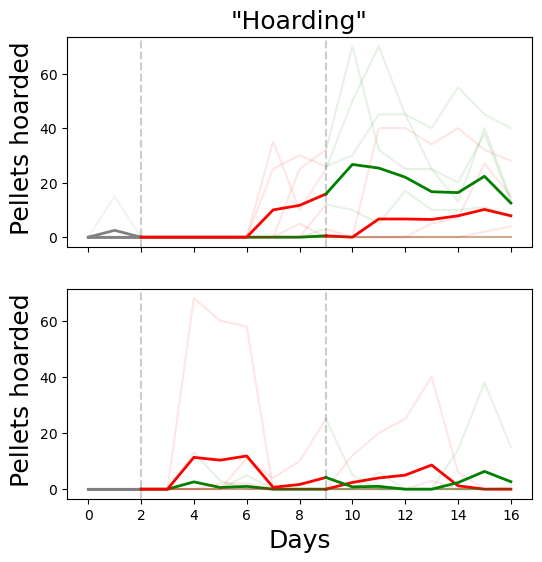

In [11]:
#plot shows timeline of total number of pellets hoarded per day in NRPR and PRNR male and Females

def timeline_fig(data, ax=[], ylabel="", **kwargs):
    if ax == []:
        f, ax = plt.subplots() #could check if ax is axis object
    
    for trace in data:
        ax.plot(trace, color="grey", alpha=0.3)
    ax.plot(np.mean(data, axis=0), linewidth=2)

    ax.set_ylabel(ylabel)
    ax.axvline(2, linestyle="--", color="k")
    ax.axvline(9, linestyle="--", color="k")

    return ax

def timeline_multicolor_fig(data, ax=[], ylabel="", colors=[], day_split=[2, 9], max_days=17, **kwargs):
    if ax == []:
        f, ax = plt.subplots() #could check if ax is axis object

    colors_reversed = colors[-1:]

    for group in data:
        for trace in group:
            trace = trace[:max_days]
            ax.plot(range(0,3), trace[:3], color="grey", alpha=0.1)
            ax.plot(range(2,10), trace[2:10], color=colors[0], alpha=0.1)
            ax.plot(range(9,len(trace)), trace[9:], color=colors[1], alpha=0.1)

        mean = np.mean(group, axis=0)[:max_days]
        ax.plot(range(0,3), mean[:3], color="grey", linewidth=2)
        ax.plot(range(2,10), mean[2:10], color=colors[0], linewidth=2)
        ax.plot(range(9,len(mean)), mean[9:], color=colors[1], linewidth=2)

        colors.reverse()

    ax.set_ylabel(ylabel,fontsize = 18)
    ax.axvline(2, linestyle="--", color="k", alpha=0.2)
    ax.axvline(9, linestyle="--", color="k", alpha=0.2)

    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)

    return ax

nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}
nrpr_female_selector = {"order": 1, "sex": "F"}
prnr_female_selector = {"order": 2, "sex": "F"}

nrpr_m = get_data_fields(mice, ["hoarding"], nrpr_male_selector)
prnr_m = get_data_fields(mice, ["hoarding"], prnr_male_selector)
nrpr_f = get_data_fields(mice, ["hoarding"], nrpr_female_selector)
prnr_f = get_data_fields(mice, ["hoarding"], prnr_female_selector)

f, ax = plt.subplots(nrows=2, sharex=True, figsize=(6,6))

timeline_multicolor_fig([nrpr_m, prnr_m], colors=["green", "red"], ylabel=" Pellets hoarded", ax=ax[0])
timeline_multicolor_fig([nrpr_f, prnr_f], colors=["green", "red"], ylabel=" Pellets hoarded", ax=ax[1])

ax[1].set_xlabel("Days",fontsize = 18)
ax[0].set_title('"Hoarding"',fontsize = 18)
figfolder = "C:\\Users\\hta031\OneDrive - UiT Office 365\\Documents\\People\\Hamid\\Presentations\\SSIB2022\\Poster\\Fig\\"
#f.savefig(figfolder + "timeline hoarding.pdf")

6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>


C:\ProgramData\Anaconda3\lib\site-packages\trompy\barscatter.py:304: UserWarning: linewuidth is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


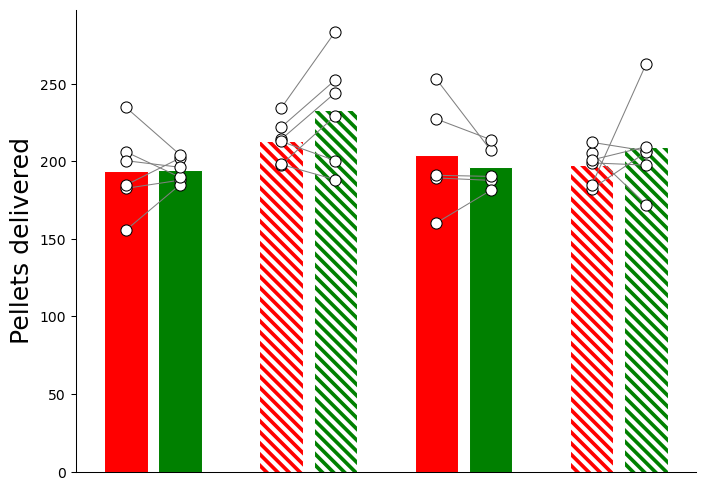

In [12]:
#plot for average number of pellets taken by NRPR and PRNR males and Females

nrpr_avg = get_data_fields(mice, ["pr_avg_pellets","nr_avg_pellets" ],nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_avg_pellets", "nr_avg_pellets"],prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_avg_pellets","nr_avg_pellets"],nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_avg_pellets","nr_avg_pellets"],prnr_female_selector)

f, ax = plt.subplots(figsize= (8, 6))
_, _, barlist, _ = tp.barscatter([nrpr_avg, prnr_avg, nrprf_avg, prnrf_avg], ax=ax, paired=True,linewuidth =1, groupwidth = 0.70,
barfacecolor_option="individual", baredgecolor= ["white"]*8, barfacecolor=["red", "green", "red", "green", "red", "green", "red", "green"],
barlabels = ["NRPR Males", "PRNR Males", "NRPR Females", "PRNR Females"] )

ax.set_ylabel("Pellets delivered",fontsize = 18)
ax.set_xlabel("")
plt.rcParams["hatch.linewidth"] = 3

# this code puts hatching on bars 3 and 4 

for i in [barlist[2], barlist[3], barlist[6],barlist[7]]:
    print(i)
    bar = i.get_children()
    bar[0].set_hatch("\\\\\\")
    bar[0].set_edgecolor("white")


figfolder2 = "C:\\Users\\hta031\OneDrive - UiT Office 365\\Documents\\People\\Hamid\\Presentations\\2022\\Oct\\The Arctic Biology talk Oct 2022\\IMAGES\\"
#f.savefig(figfolder2 + "avreage pellets delievered red bar first.pdf")

6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>


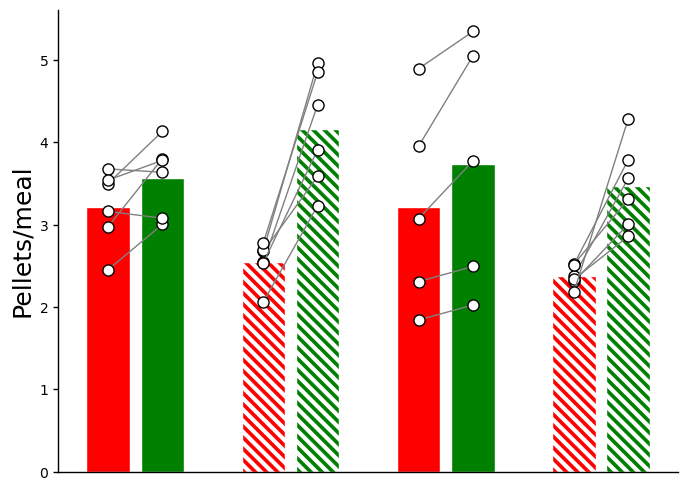

In [13]:
#plot for avreage mealsize consumed by NRPR and PRNR males and Females.

nrpr_avg = get_data_fields(mice, ["mealsize_pr","mealsize_nr"], nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["mealsize_pr", "mealsize_nr"], prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["mealsize_pr", "mealsize_nr"], nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["mealsize_pr", "mealsize_nr"], prnr_female_selector)

figfolder = "C:\\Users\\hta031\OneDrive - UiT Office 365\\Documents\\People\\Hamid\\Presentations\\SSIB2022\\Poster\\Fig\\"
f, ax = plt.subplots(figsize=(8,6))
_, _, barlist, _ = tp.barscatter([nrpr_avg, prnr_avg,nrprf_avg, prnrf_avg], ax=ax, paired=True,linewidth =1, groupwidth = 0.70,show_legend= False,
barfacecolor_option="individual",baredgecolor= ["white"]*8, barfacecolor=["red", "green", "red", "green", "red", "green", "red", "green"])
ax.set_ylabel("Pellets/meal",fontsize = 18)
ax.set_xlabel("")
plt.rcParams["hatch.linewidth"] = 3

# this code puts hatching on bars 3 and 4 
for i in [barlist[2], barlist[3], barlist[6],barlist[7]]:
    print(i)
    bar = i.get_children()
    bar[0].set_hatch("\\\\\\")
    bar[0].set_edgecolor("white")
   
    
    

#f.savefig(figfolder2 + "mealsize red bar first.pdf")

In [14]:
nrpr_avg

[[3.5013698630136987,
  3.679054054054054,
  2.975257731958763,
  3.5424657534246577,
  2.452797202797203,
  3.1615384615384614],
 [4.135220125786163,
  3.6376404494382024,
  3.805157593123209,
  3.783422459893048,
  3.0043763676148796,
  3.0797413793103448]]

In [63]:
def interpellet_interval_plot(data, ax=[], colors=[], fill=False, labels=[], linestyle="-", **kwargs):
    """
    FED3 Viz: Plot a histogram of interpellet intervals for multiple devices.
    Parameters
    ----------
    FEDs : list of FED3_File objects
        FED3 files (loaded by load.FED3_File)
    kde : bool
        Whether or not to include kernel density estimation, which plots
        probability density (rather than count) and includes a fit line (see
        seaborn.distplot)
    **kwargs :
        ax : matplotlib.axes.Axes
            Axes to plot on, a new Figure and Axes are
            created if not passed
        date_filter : array
            A two-element array of datetimes (start, end) used to filter
            the data
        **kwargs also allows FED3 Viz to pass all settings to all functions.
    Returns
    -------
    fig : matplotlib.figure.Figure
    """

    if ax == []:
        f, ax = plt.subplots()

    if len(colors) != len(data):
        colors = ["grey"] * len(data)
    print(colors)

    if len(labels) != len(data):
        labels = [str(n) for n in range(len(data))]

    for idx, group in enumerate(data):

        y = tp.flatten_list(group)
        y = [np.log10(val*60) for val in y if val > 0]
            
        sns.kdeplot(y, ax=ax,
                    color=colors[idx],
                    fill=fill,
                    label=labels[idx],
                    linestyle=linestyle)

    ax.set_ylabel('Density',fontsize = 12)
    ax.set_xlabel('Minutes',fontsize = 12)

    ax.set_xticks(range(-2,4))
    ax.set_xticklabels([10**num for num in range(-2,4)])

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

6 items in output dictionary
6 items in output dictionary
6 items in output dictionary
6 items in output dictionary
['green', 'red']
['green', 'red']


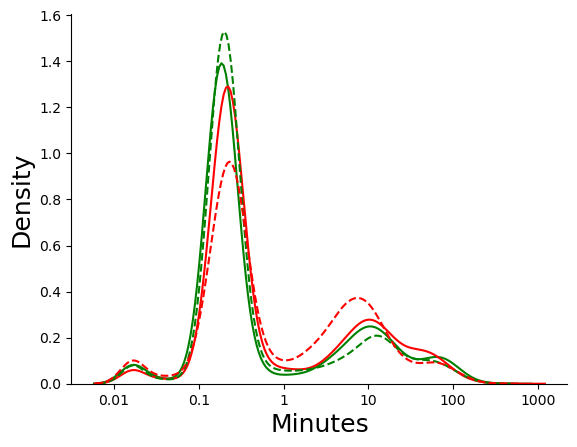

In [61]:
nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}

IPIs_m_nrpr_pr = get_data_fields(mice, ["interpellet_intervals_pr"], nrpr_male_selector)
IPIs_m_nrpr_nr = get_data_fields(mice, ["interpellet_intervals_nr"], nrpr_male_selector)

IPIs_m_prnr_pr = get_data_fields(mice, ["interpellet_intervals_pr"], prnr_male_selector)
IPIs_m_prnr_nr = get_data_fields(mice, ["interpellet_intervals_nr"], prnr_male_selector)

f, ax = plt.subplots()

interpellet_interval_plot([IPIs_m_nrpr_nr, IPIs_m_nrpr_pr],
                           colors=["green", "red"],
                           linestyle="-",
                           ax=ax)

interpellet_interval_plot([IPIs_m_prnr_nr, IPIs_m_prnr_pr],
                           colors=["green", "red"],
                           linestyle="--",
                           ax=ax)

['green', 'red']
['xkcd:kelly green', 'pink']


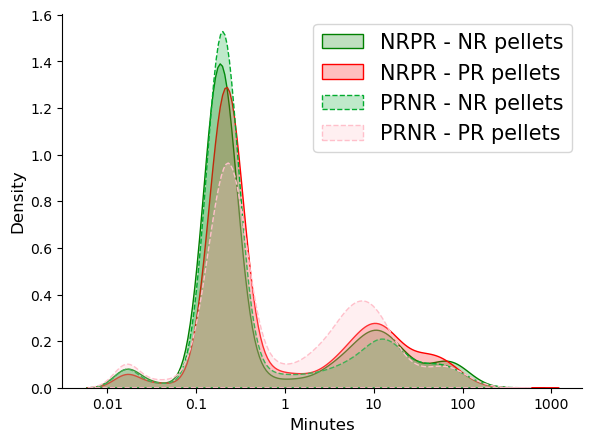

In [65]:
f, ax = plt.subplots(figsize = (8,5.5), gridspec_kw= {"left":0.25,"bottom": 0.2})

interpellet_interval_plot([IPIs_m_nrpr_nr, IPIs_m_nrpr_pr],
                           colors=["green", "red"],
                           labels=["NRPR - NR pellets", "NRPR - PR pellets"],
                           linestyle="-",
                           fill=True,
                           ax=ax)

interpellet_interval_plot([IPIs_m_prnr_nr, IPIs_m_prnr_pr],
                           colors=["xkcd:kelly green", "pink"],
                           labels=["PRNR - NR pellets", "PRNR - PR pellets"],
                           linestyle="--",
                           fill=True,
                           ax=ax)

ax.legend(fontsize = 15)

#f.savefig(figfolder + "interpelletintervalmale.pdf")


figfolder = r"C:\Users\hta031\OneDrive - UiT Office 365\Documents\People\Hamid\Educational Component\Midway_Evaluation\MIDWAY_PRESENTATION\FIGS\\"
f.savefig(figfolder + "Kernel_all_groups.tif")

['green', 'red']
['xkcd:kelly green', 'pink']


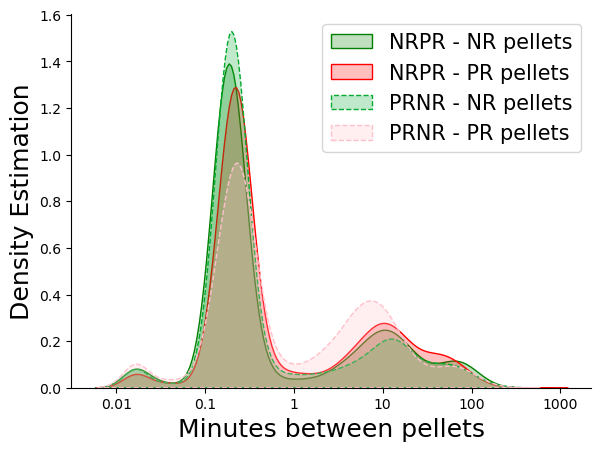

In [14]:
f, ax = plt.subplots(figsize = (8,5.5), gridspec_kw= {"left":0.25,"bottom": 0.2})

interpellet_interval_plot([IPIs_m_nrpr_nr, IPIs_m_nrpr_pr],
                           colors=["green", "red"],
                           labels=["NRPR - NR pellets", "NRPR - PR pellets"],
                           linestyle="-",
                           fill=True,
                           ax=ax)

interpellet_interval_plot([IPIs_m_prnr_nr, IPIs_m_prnr_pr],
                           colors=["xkcd:kelly green", "pink"],
                           labels=["PRNR - NR pellets", "PRNR - PR pellets"],
                           linestyle="--",
                           fill=True,
                           ax=ax)

ax.legend(fontsize = 15)

#f.savefig(figfolder + "interpelletintervalmale.pdf")

5 items in output dictionary
5 items in output dictionary
6 items in output dictionary
6 items in output dictionary
['green', 'red']
['green', 'red']


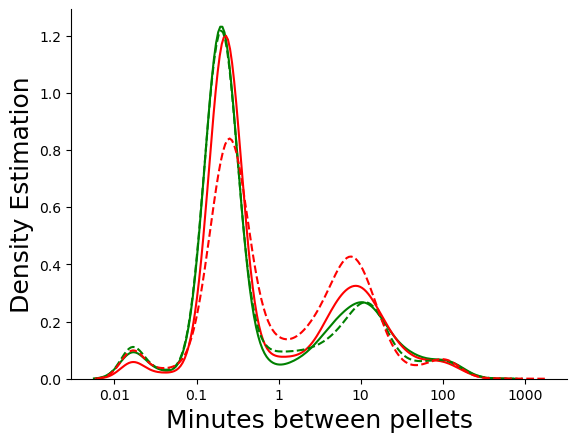

In [15]:
nrpr_female_selector = {"order": 1, "sex": "F"}
prnr_female_selector = {"order": 2, "sex": "F"}

IPIs_f_nrpr_pr = get_data_fields(mice, ["interpellet_intervals_pr"], nrpr_female_selector)
IPIs_f_nrpr_nr = get_data_fields(mice, ["interpellet_intervals_nr"], nrpr_female_selector)

IPIs_f_prnr_pr = get_data_fields(mice, ["interpellet_intervals_pr"], prnr_female_selector)
IPIs_f_prnr_nr = get_data_fields(mice, ["interpellet_intervals_nr"], prnr_female_selector)

f, ax = plt.subplots()

interpellet_interval_plot([IPIs_f_nrpr_nr, IPIs_f_nrpr_pr],
                           colors=["green", "red"],
                           linestyle="-",
                           ax=ax)

interpellet_interval_plot([IPIs_f_prnr_nr, IPIs_f_prnr_pr],
                           colors=["green", "red"],
                           linestyle="--",
                           ax=ax)



['green', 'red']
['xkcd:kelly green', 'pink']


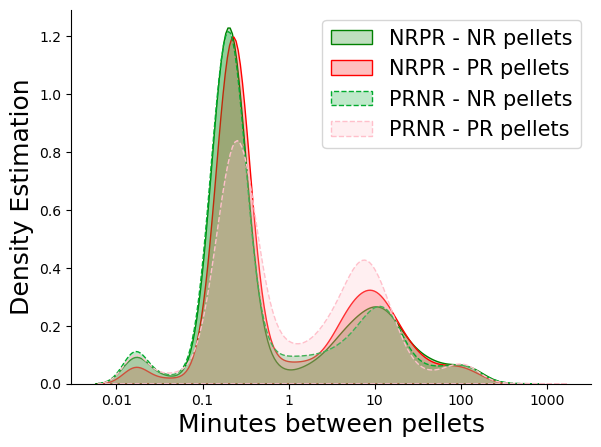

In [16]:
f, ax = plt.subplots(figsize = (8,5.5), gridspec_kw= {"left":0.25,"bottom": 0.2})

interpellet_interval_plot([IPIs_f_nrpr_nr, IPIs_f_nrpr_pr],
                           colors=["green", "red"],
                           labels=["NRPR - NR pellets", "NRPR - PR pellets"],
                           linestyle="-",
                           fill=True,
                           ax=ax)

interpellet_interval_plot([IPIs_f_prnr_nr, IPIs_f_prnr_pr],
                           colors=["xkcd:kelly green", "pink"],
                           labels=["PRNR - NR pellets", "PRNR - PR pellets"],
                           linestyle="--",
                           fill=True,
                           ax=ax)

ax.legend(fontsize = 15)

#f.savefig(figfolder + "interpelletintervalfemale.pdf")

6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>


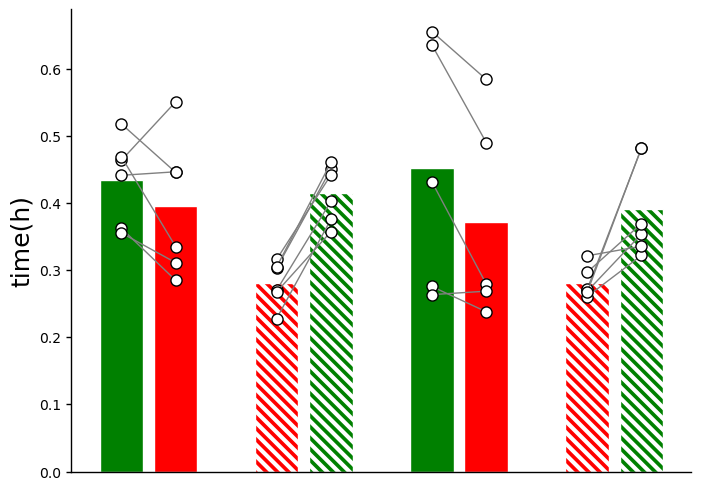

In [18]:
#plot for avreage intermeal interval of NRPR and PRNR males and Females.

nrpr_avg = get_data_fields(mice, ["intermeal_interval_nr", "intermeal_interval_pr"], nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["intermeal_interval_pr", "intermeal_interval_nr"], prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["intermeal_interval_nr", "intermeal_interval_pr"], nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["intermeal_interval_pr", "intermeal_interval_nr"], prnr_female_selector)

figfolder = "C:\\Users\\hta031\OneDrive - UiT Office 365\\Documents\\People\\Hamid\\Presentations\\SSIB2022\\Poster\\Fig\\"
f, ax = plt.subplots(figsize=(8,6))
_, _, barlist, _ = tp.barscatter([nrpr_avg, prnr_avg,nrprf_avg, prnrf_avg], ax=ax, paired=True,linewidth =1, groupwidth = 0.70,show_legend= False,
barfacecolor_option="individual",baredgecolor= ["white"]*8, barfacecolor=["green", "red", "red", "green", "green", "red", "red", "green"])
ax.set_ylabel("time(h)",fontsize = 18)
ax.set_xlabel("")
plt.rcParams["hatch.linewidth"] = 3

# this code puts hatching on bars 3 and 4 
for i in [barlist[2], barlist[3], barlist[6],barlist[7]]:
    print(i)
    bar = i.get_children()
    bar[0].set_hatch("\\\\\\")
    bar[0].set_edgecolor("white")

   
    

#f.savefig(figfolder + "mealsize.pdf")

[[0.5181201956673659,
  0.4636899188514358,
  0.46933779051257557,
  0.4414431075460492,
  0.3625686846584002,
  0.3555747126436783],
 [0.4457945205479456,
  0.551035097597598,
  0.3351008018327611,
  0.44670776255707767,
  0.2848606254856254,
  0.31129807692307715]]

AttributeError: 'list' object has no attribute 'to_csv'

['green']


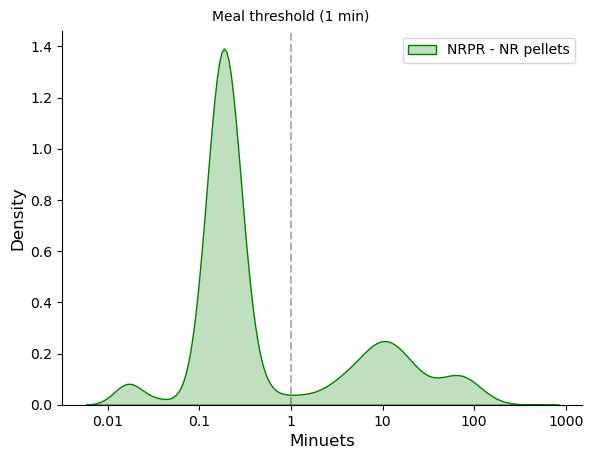

In [57]:
# in this cell I am plotting only male control rats during NR pellet phase
def interpellet_interval_plot(data, ax=[], colors=[], fill=False, labels=[], linestyle="-", **kwargs):
    """
    FED3 Viz: Plot a histogram of interpellet intervals for multiple devices.
    Parameters
    ----------
    FEDs : list of FED3_File objects
        FED3 files (loaded by load.FED3_File)
    kde : bool
        Whether or not to include kernel density estimation, which plots
        probability density (rather than count) and includes a fit line (see
        seaborn.distplot)
    **kwargs :
        ax : matplotlib.axes.Axes
            Axes to plot on, a new Figure and Axes are
            created if not passed
        date_filter : array
            A two-element array of datetimes (start, end) used to filter
            the data
        **kwargs also allows FED3 Viz to pass all settings to all functions.
    Returns
    -------
    fig : matplotlib.figure.Figure
    """

    if ax == []:
        f, ax = plt.subplots()

    if len(colors) != len(data):
        colors = ["grey"] * len(data)
    print(colors)

    if len(labels) != len(data):
        labels = [str(n) for n in range(len(data))]

    for idx, group in enumerate(data):

        y = tp.flatten_list(group)
        y = [np.log10(val*60) for val in y if val > 0]
            
        sns.kdeplot(y, ax=ax,
                    color=colors[idx],
                    fill=fill,
                    label=labels[idx],
                    
                    linestyle=linestyle)

    ax.set_ylabel('Density',fontsize = 12)
    ax.set_xlabel('Minuets',fontsize = 12)

    ax.set_xticks(range(-2,4))
    ax.set_xticklabels([10**num for num in range(-2,4)])

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
f, ax = plt.subplots(figsize = (8,5.5), gridspec_kw= {"left":0.25,"bottom": 0.2})

interpellet_interval_plot([IPIs_m_nrpr_nr],
                           colors=["green"],
                           labels=["NRPR - NR pellets"],
                           linestyle="-",
                           fill=True,
                           ax=ax)

# interpellet_interval_plot([ IPIs_m_prnr_pr],
#                            colors=[ "red"],
#                            labels=[ "PRNR - PR pellets"],
#                            linestyle="--",
#                            fill=False,
#                            ax=ax)

ax.legend(fontsize = 10)

ax.axvline(0, linestyle="--", color="black", alpha=0.3)
ax.text(0,1.5, "Meal threshold (1 min)", ha="center")

figfolder = r"C:\Users\hta031\OneDrive - UiT Office 365\Documents\People\Hamid\Educational Component\Midway_Evaluation\MIDWAY_PRESENTATION\FIGS\\"
#f.savefig(figfolder + "Meal_threshold.tif")